## Ejercicios 4 y 5
4.  En este ejercicio, utilizaremos el dataset de automóviles disponible en el siguiente enlace: 
https://archive.ics.uci.edu/static/public/9/auto+mpg.zip. Este conjunto de datos contiene 
información sobre varios atributos de automóviles, incluyendo Millas por galón de combustible (MPG)
y Caballos de Fuerza (HP).

    a. Ajustar un modelo lineal que relacione MPG con HP utilizando todos los puntos del dataset.
    Calcular el 𝑅2 para este modelo.  
- (i)Ajustar logaritmo de MPG vs HP y calcular 𝑅2.  
- (ii)Ajustar logaritmo de MPG vs logaritmo HP y calcular 𝑅2.

R2 del logMPG vs HP: 0.6891575108068901


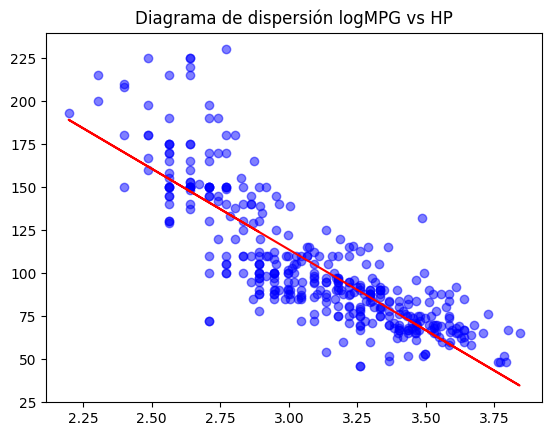

R2 del logMPG vs logHP: 0.722696751235987


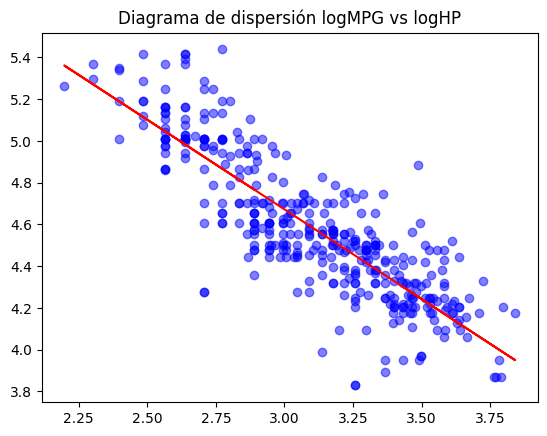

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the txt file as if it were a CSV with tab or space separation
file_path = '/workspaces/Estadistica1/Practica regresion/auto-mpg.data'
df = pd.read_csv(file_path, sep= r'\s+', header=None)
# Rename columns
df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') 
df = df.dropna()

muestras_x = df['mpg']
log_x = np.log(muestras_x) #Aplicamos logaritmo por consigna
muestras_y = df['horsepower']
log_y = np.log(muestras_y) #Same here


#i->logMPG vs HP
b1,b0 =np.polyfit(log_x,muestras_y, 1)
y = b0 + b1*log_x
residuales = muestras_y - y
r2 = 1 - sum(residuales**2)/sum((muestras_y - np.mean(muestras_y))**2)
print('R2 del logMPG vs HP:', r2)

# Graficar el diagrama de dispersión
plt.scatter(log_x, muestras_y, color='blue', alpha=0.5)
plt.plot(log_x, log_x*b1 + b0, color='red')
plt.title('Diagrama de dispersión logMPG vs HP')
plt.show()


#ii->logMPG vs logHP
beta1,beta0 = np.polyfit(log_x,log_y, 1)

y = beta0 + beta1*log_x

residuales = log_y - y
r2 = 1 - sum(residuales**2)/sum((log_y - np.mean(log_y))**2)
print('R2 del logMPG vs logHP:', r2)

# Graficar el diagrama de dispersión
plt.scatter(log_x, log_y, color='blue', alpha=0.5)
plt.plot(log_x, log_x*beta1 + beta0, color='red')
plt.title('Diagrama de dispersión logMPG vs logHP')
plt.show()



(b) Veamos qué pasa si no usamos todo el dataset sino sólo un porcentaje.  
- (i)Ajustar un modelo lineal a MPGvsHP,pero esta vez utilizando solo el 80% de los puntos del dataset seleccionados al azar. ¿Cuánto vale 𝑅2? ¿Y sobre el 20% restante de los puntos?  
- (ii)Repetir el punto anterior para diferentes porcentajes de datos de entrenamiento.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

muestras_x= df['mpg']
muestras_y= df['horsepower']    

#Separamos el dataset en train y test (80 y 20)
X_train, X_test, y_train, y_test = train_test_split(muestras_x, muestras_y, test_size=0.2, random_state=42)

beta1,beta0= np.polyfit(X_train,y_train, 1)
y = beta0 + beta1*X_train
residuales = y_train - y

r2 = 1 - sum(residuales**2)/sum((y_train - np.mean(y_train))**2)
print('R2 del MPG vs HP:', r2)

#vemos como se comporta el modelo con el dataset de test
y_test_pred = beta0 + beta1*X_test
residuales = y_test - y_test_pred
r2 = 1 - sum(residuales**2)/sum((y_test - np.mean(y_test))**2)
print('R2 del MPG vs HP con el dataset de test:', r2)


R2 del MPG vs HP: 0.6121193728863612
R2 del MPG vs HP con el dataset de test: 0.5800751948319572


In [34]:
#Ahora lo volvemos a hacer con otro porcentaje (70 y 30)
X_train, X_test, y_train, y_test = train_test_split(muestras_x, muestras_y, test_size=0.3, random_state=42)

beta1,beta0= np.polyfit(X_train,y_train, 1)
y = beta0 + beta1*X_train
residuales = y_train - y

r2 = 1 - sum(residuales**2)/sum((y_train - np.mean(y_train))**2)
print('R2 del MPG vs HP:', r2)

#vemos como se comporta el modelo con el dataset de test
y_test_pred = beta0 + beta1*X_test
residuales = y_test - y_test_pred
r2 = 1 - sum(residuales**2)/sum((y_test - np.mean(y_test))**2)
print('R2 del MPG vs HP con el dataset de test:', r2)


R2 del MPG vs HP: 0.6262397134870881
R2 del MPG vs HP con el dataset de test: 0.557883976456414


(c) Utilizando el dataset completo, realizar ajustes lineales para relacionar MPG con cada una
 de las variables. Ordenar las variables de acuerdo al 𝑅2 obtenido de la más importante a la
 menos importante

In [35]:
R2={}
columnas= ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']

# Convertir las columnas a numéricas y eliminar filas con valores NaN solo una vez
df[columnas] = df[columnas].apply(pd.to_numeric, errors='coerce') 
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')
df = df.dropna(subset=columnas + ['mpg'])  # Eliminar filas con valores NaN en las columnas relevantes

# Actualizar muestras_x después de eliminar NaN
muestras_x = df['mpg']

for columna in columnas:
    muestras_y = df[columna]
    b1,b0 = np.polyfit(muestras_x,muestras_y, 1)
    y = b0 + b1*muestras_x
    residuales = muestras_y - y
    r2 = 1 - sum(residuales**2)/sum((muestras_y - np.mean(muestras_y))**2)
    R2[columna] = r2
R2 = dict(sorted(R2.items(), key=lambda item: item[1], reverse=True))
print(R2)



{'weight': 0.6926304331206254, 'displacement': 0.6482294003193044, 'horsepower': 0.6059482578894348, 'cylinders': 0.6046889889441246, 'model_year': 0.3370278133096227, 'origin': 0.3194609386689673, 'acceleration': 0.1792070501562545}


 5. Con el dataset del ejercicio anterior:
 * (a) Ajustar una regresión lineal múltiple de MPG en función de todas las otras variables. Hacer los gráficos pertinentes para analizar el comportamiento del modelo.
 * (b) Hacer forward selection para seleccionar el mejor modelo de regresión según el estadístico de  Mallow. Este proceso consiste en agregar una variable a la vez al modelo inicial y comparar el valor del estadístico de Mallow para cada modelo, eligiendo el del valor más bajo.
* (c)
 Realizar la regresión con todas las variables, pero con regularización de Ridge y de Lasso.
 Dividir el dataset en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%) para elegir el mejor valor de 𝜆 para cada uno.

In [36]:
#pensamos al modelo mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + origin 
# Calcular beta_hat usando la fórmula de MCO: β = (X'X)^(-1)X'y
def get_beta_hat(X, y):
    beta_hat =  np.linalg.inv(X.T @ X) @ X.T @ y
    return beta_hat

regresores  = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
X = df[regresores].values
y = df['mpg'].values

X = np.c_[np.ones(X.shape[0]), X]  # Agregar una columna de unos para el intercepto

beta_hat = get_beta_hat(X, y)
print('Los coeficientes de estimados son:', beta_hat)


Los coeficientes de estimados son: [-1.72184346e+01 -4.93376319e-01  1.98956437e-02 -1.69511442e-02
 -6.47404340e-03  8.05758383e-02  7.50772678e-01  1.42614050e+00]


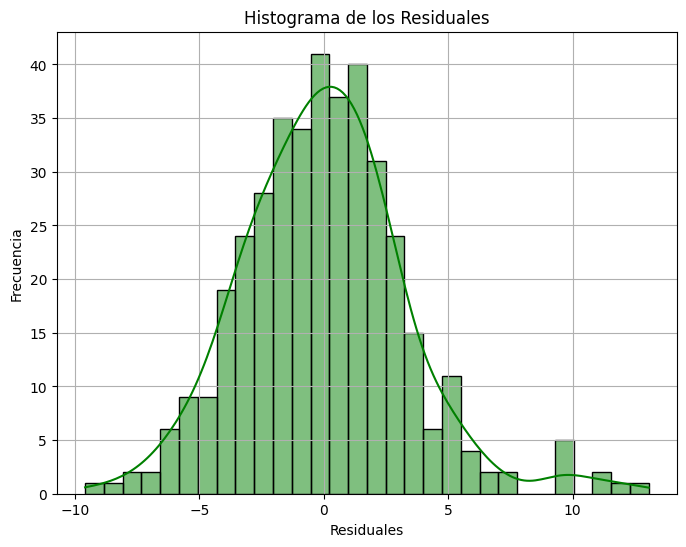

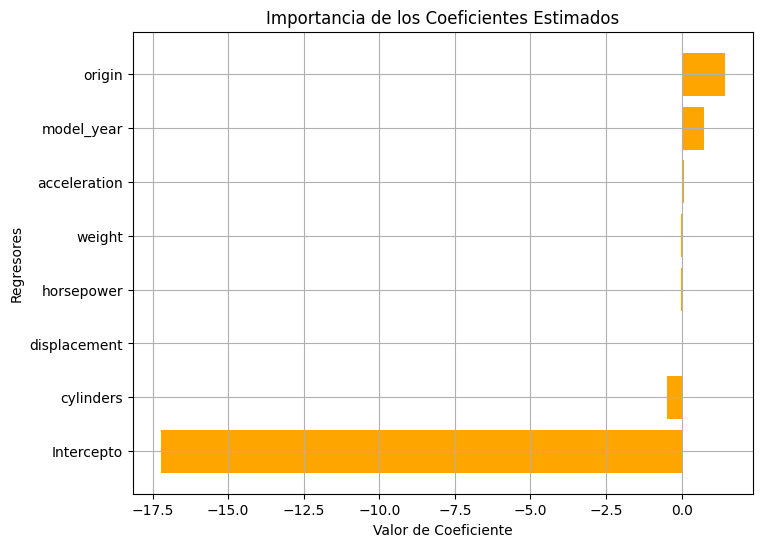

In [37]:

# Función para calcular los valores ajustados y los residuales
def calcular_valores_ajustados(X, beta_hat):
    # Calcula los valores ajustados
    y_pred = X @ beta_hat
    return y_pred

# Calcular los valores ajustados (predichos) y los residuales
y_pred = calcular_valores_ajustados(X, beta_hat)
residuales = y - y_pred

#Historama de los residuales
plt.figure(figsize=(8, 6))
sns.histplot(residuales, kde=True, color='green', bins=30)
plt.title('Histograma de los Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#Gráfico de importancia de los coeficientes
coef_names = ['Intercepto'] + regresores  # Incluye el intercepto
plt.figure(figsize=(8, 6))
plt.barh(coef_names, beta_hat, color='orange')
plt.title('Importancia de los Coeficientes Estimados')
plt.xlabel('Valor de Coeficiente')
plt.ylabel('Regresores')
plt.grid(True)
plt.show()


In [40]:
#5.b (no se como se piensan que podia hacer este codigo sin ayuda de GPT)
import numpy as np
from sklearn.linear_model import LinearRegression

# Función para calcular Mallows Cp
def mallows_cp(X, y, sigma_squared, p):
    # Ajustar el modelo de regresión
    reg = LinearRegression().fit(X, y)
    
    # Predecir los valores
    y_pred = reg.predict(X)
    
    # Suma de los cuadrados de los errores (SSE)
    SSE_p = np.sum((y - y_pred) ** 2)
    
    # Calcular Cp
    n = len(y)
    Cp = (SSE_p / sigma_squared) + 2 * p - n
    return Cp

# Obtener la varianza de los errores del modelo completo (σ^2)
def calcular_sigma_squared(X, y):
    reg_full = LinearRegression().fit(X, y)
    y_full_pred = reg_full.predict(X)
    SSE_full = np.sum((y - y_full_pred) ** 2)
    sigma_squared = SSE_full / (len(y) - X.shape[1])
    return sigma_squared

# Realizar Forward Selection con el estadístico de Mallows Cp
def forward_selection_cp(X, y, max_features):
    # Lista de todas las variables disponibles
    variables_disponibles = list(range(X.shape[1]))
    
    # Empezamos con un modelo vacío
    variables_seleccionadas = []
    sigma_squared = calcular_sigma_squared(X, y)
    mejor_modelo = None
    mejor_Cp = float('inf')

    # Repetir hasta que se seleccionen el número máximo de variables o Cp no mejore
    for _ in range(max_features):
        Cp_minimo = float('inf')
        mejor_variable = None

        # Intentar agregar cada variable no seleccionada al modelo actual
        for variable in variables_disponibles:
            # Crear el modelo con las variables seleccionadas más la nueva variable
            X_temp = X[:, variables_seleccionadas + [variable]]
            
            # Calcular el Cp para este modelo
            Cp = mallows_cp(X_temp, y, sigma_squared, p=len(variables_seleccionadas) + 1)
            
            # Verificar si es el mejor Cp encontrado hasta ahora
            if Cp < Cp_minimo:
                Cp_minimo = Cp
                mejor_variable = variable

        # Detener el proceso si el Cp no mejora
        if Cp_minimo >= mejor_Cp:
            print(f"Se detiene la selección en el modelo con {len(variables_seleccionadas)} variables, Cp: {mejor_Cp}")
            break

        # Agregar la mejor variable encontrada si mejora Cp
        if mejor_variable is not None:
            variables_seleccionadas.append(mejor_variable)
            variables_disponibles.remove(mejor_variable)
            mejor_Cp = Cp_minimo
            mejor_modelo = variables_seleccionadas.copy()

        # Imprimir el estado del modelo
        print(f"Variables seleccionadas: {mejor_modelo}, Mallows Cp: {mejor_Cp}")

    return mejor_modelo, mejor_Cp

# Supongamos que tenemos el DataFrame df con las variables
regresores = ['weight', 'cylinders', 'model_year', 'origin', 'displacement', 'horsepower', 'acceleration']
X = df[regresores].values
y = df['mpg'].values

# Llamar a la función para hacer Forward Selection
mejor_modelo, mejor_Cp = forward_selection_cp(X, y, max_features=len(regresores))

# Imprimir el resultado final
print(f"Mejor modelo: {mejor_modelo}, con Mallows Cp: {mejor_Cp}")
print(f"Variables seleccionadas: {[regresores[i] for i in mejor_modelo]}")

Variables seleccionadas: [0], Mallows Cp: 272.87255321895657
Variables seleccionadas: [0, 2], Mallows Cp: 25.677943754599767
Variables seleccionadas: [0, 2, 3], Mallows Cp: 7.682230937653458
Se detiene la selección en el modelo con 3 variables, Cp: 7.682230937653458
Mejor modelo: [0, 2, 3], con Mallows Cp: 7.682230937653458
Variables seleccionadas: ['weight', 'model_year', 'origin']


In [43]:
#5.c
#Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
beta_hat = get_beta_hat(X_train, y_train)
y_hat = X_train @ beta_hat

#Regularización Lasso
from sklearn.linear_model import Lasso
lasso = np.sum((y_train - y_hat)**2) + lambda * np.sum(np.abs(beta_hat))
